# Module 3 Case Study: Transaction Fraud Detection

# 02/17/2024

## **Exploratory Data Analysis:**
Analyze the transaction data to engineer features. Below is the list of questions your supervisor would like you to analyze. For every question, provide figures and tables supporting your response, and explain how your findings will influence how you would design your features, the fraud detection model, or the overall system. Report your findings (analysis and design decisions) in a jupyter notebook.


# Libraries:

In [2]:
!pip install pandas 
!pip install numpy 
!pip install scikit-learn 

In [15]:
import pandas as pd
import numpy as np
import sklearn
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file
import matplotlib.pyplot as plt

pd.set_option("display.precision", 2)

# Data Integration:

In [4]:
# data integration
data = pd.read_csv('transactions.csv')

# displaying the first five rows of the dataset
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Quick overview of the dataset


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   sex                    object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [8]:
numerical_features = data.select_dtypes(include=['int64', 'float64'])
numerical_features.corr()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.000295,-0.002413,0.001048,0.000729,-0.000604,-0.001622,0.999525,0.000690,-0.000601,-0.013283
cc_num,0.000295,1.000000,0.001826,0.041504,-0.058744,-0.048429,-0.009118,0.000284,-0.058415,-0.048421,-0.001125
amt,-0.002413,0.001826,1.000000,0.001979,-0.000670,-0.000735,0.004921,-0.002411,-0.000613,-0.000711,0.209308
zip,0.001048,0.041504,0.001979,1.000000,-0.114554,-0.909795,0.077601,0.001017,-0.113934,-0.908981,-0.002190
lat,0.000729,-0.058744,-0.000670,-0.114554,1.000000,-0.014744,-0.154816,0.000741,0.993582,-0.014709,0.002904
long,-0.000604,-0.048429,-0.000735,-0.909795,-0.014744,1.000000,-0.052359,-0.000574,-0.014585,0.999118,0.001022
city_pop,-0.001622,-0.009118,0.004921,0.077601,-0.154816,-0.052359,1.000000,-0.001636,-0.153863,-0.052329,0.000325
unix_time,0.999525,0.000284,-0.002411,0.001017,0.000741,-0.000574,-0.001636,1.000000,0.000696,-0.000571,-0.013329
merch_lat,0.000690,-0.058415,-0.000613,-0.113934,0.993582,-0.014585,-0.153863,0.000696,1.000000,-0.014554,0.002778
merch_long,-0.000601,-0.048421,-0.000711,-0.908981,-0.014709,0.999118,-0.052329,-0.000571,-0.014554,1.000000,0.000999


# Q1: What is the distribution between fraudulent and non-fraudulent transactions?
Reference: https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/

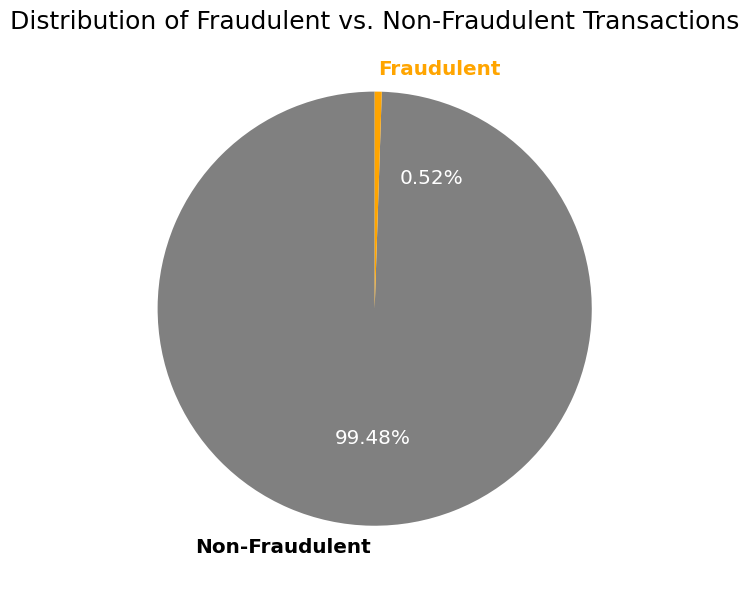

In [31]:
# Calculate counts of fraudulent and non-fraudulent transactions
fraud_distribution = data['is_fraud'].value_counts(normalize=True)

# Labels for the pie chart
labels = ['Non-Fraudulent', 'Fraudulent']

# Colors: Non-Fraudulent in grey, Fraudulent in orange
colors = ['grey', 'orange']

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    fraud_distribution, labels=labels, autopct='%1.2f%%',
    startangle=90, colors=colors,
    textprops={'size': 'x-large'})

# Change the color of the percentage texts to white
plt.setp(pcts, color='white')

fraud_index = 1  # Assuming the "Fraudulent" is the second item

# Make the label texts match the segment color for better readability
for i, pct in enumerate(pcts):
    if i == fraud_index:  # Only adjust the position for the "Fraudulent" percentage
        # Getting the current position
        x, y = pct.get_position()
        # Adjusting the position slightly to the right (increasing x)
        pct.set_position((x + 0.25, y))
        texts[i].set_color(patch.get_facecolor())

plt.setp(texts, fontweight=600)
ax.set_title('Distribution of Fraudulent vs. Non-Fraudulent Transactions', fontsize=18)
plt.tight_layout()
plt.show()

The figure above visualizes the distribution of fraudulent versus non-fraudulent transactions.It revelas that majority, 99.48%, of the transactions are non-fraudulent while only 0.52% of the transactions are fraudulent. This highlights the challenge of detecting fraudulent activities against predominantly legitamate transactions. Consequently, the stark contrast between the two categories emphasizes the need for analytical and machine learning techniques to identify fraud within such imbalanced dataset.

# Q2: Which age groups are more susceptible to fraudulent transactions?

In [38]:
# Convert 'trans_date_trans_time' to pandas datetime object
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# We only need the date, note that this code converts it back to object so we have to convert it again to datetime object
data['trans_date'] = data['trans_date_trans_time'].dt.date
data['trans_date'] = pd.to_datetime(data['trans_date'])

# Lets check
data['trans_date'].head()

0   2019-01-01
1   2019-01-01
2   2019-01-01
3   2019-01-01
4   2019-01-01
Name: trans_date, dtype: datetime64[ns]

In [39]:
# We also need to convert 'dob' to pandas datetime object
data['dob'] = pd.to_datetime(data['dob'])
# Lets check
data['dob'].head()

0   1988-03-09
1   1978-06-21
2   1962-01-19
3   1967-01-12
4   1986-03-28
Name: dob, dtype: datetime64[ns]

In [43]:
# Calculate the age of the customers at the time of the transaction
data['age_at_transaction'] = data['trans_date'].apply(lambda x: x.year) - data['dob'].dt.year
data['age_at_transaction'].head()

0    31
1    41
2    57
3    52
4    33
Name: age_at_transaction, dtype: int64

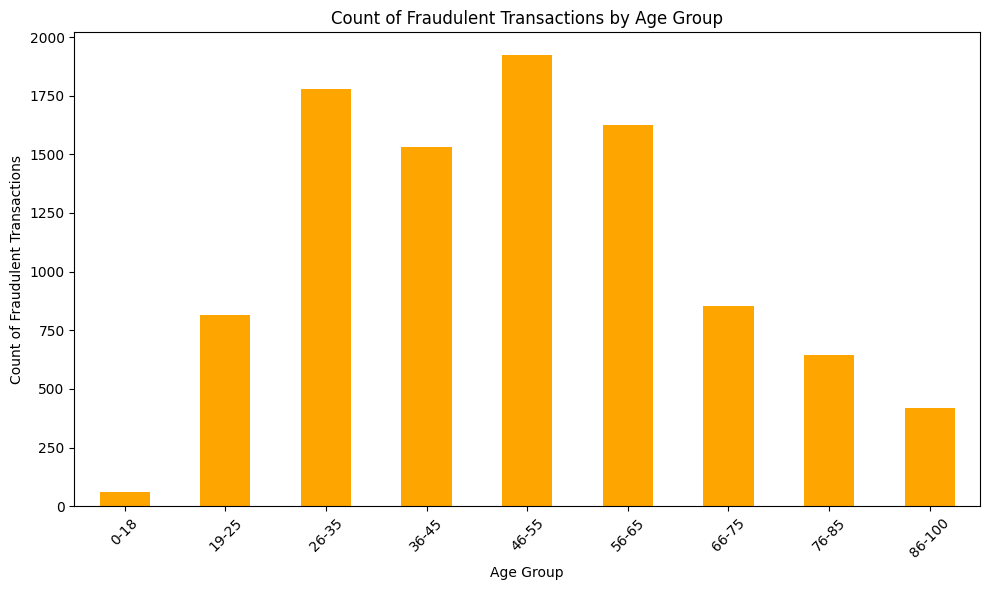

In [323]:
bins = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100']
data['age_group'] = pd.cut(data['age_at_transaction'], bins=bins, labels=labels, right=False)

# Filter for fraudulent transactions
fraud_transactions = data[data['is_fraud'] == 1]

# Group by 'age_group' and count transactions
fraud_counts_by_age_group = fraud_transactions['age_group'].value_counts().sort_index()

# Visualizing the counts
fig, ax = plt.subplots(figsize=(10, 6))
fraud_counts_by_age_group.plot(kind='bar', color='orange', ax=ax)
ax.set_title('Count of Fraudulent Transactions by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count of Fraudulent Transactions')
ax.set_xticklabels(fraud_counts_by_age_group.index, rotation=45)
plt.tight_layout()
plt.show()



In [208]:
fraud_counts_by_age_group

0-18        60
19-25      813
26-35     1778
36-45     1531
46-55     1924
56-65     1626
66-75      855
76-85      644
86-100     420
Name: age_group, dtype: int64

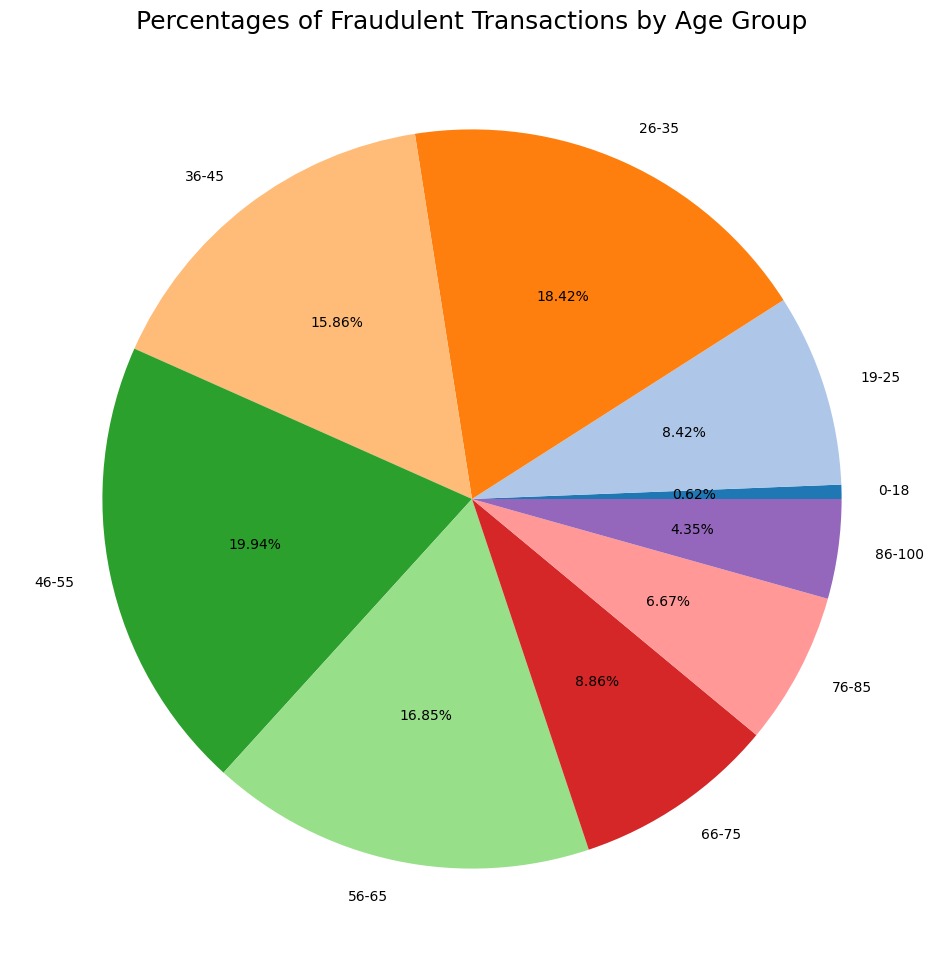

In [67]:
# Calculate percentages
total_fraud_count = fraud_counts_by_age_group.sum()
fraud_percentages_by_age_group = (fraud_counts_by_age_group / total_fraud_count) * 100

fig, ax = plt.subplots(figsize=(12, 12))
fraud_percentages_by_age_group.plot(kind='pie', ax=ax, autopct='%1.2f%%', startangle=0, colors=plt.cm.tab20.colors)
ax.set_ylabel('')  
ax.set_title('Percentages of Fraudulent Transactions by Age Group', fontsize=18)
plt.show()

Based on the fraud percentages by age group shown in the figure above, it is evident that certain age groups are more susceptible to fraudulent transactions than others. The data shows that the age group 46-55 has the highest percentage of fraudulent transactions at 19.94%, closely followed by the 26-35 age group at 18.42%, and then the 56-65 age group at 16.85%. This suggests that middle-aged individuals, particularly those between the ages of 46 and 55, are the most targeted or susceptible group for fraudulent activities within this dataset. On the other hand, the youngest (0-18) and the oldest (86-100) age groups show the lowest percentages of fraudulent transactions, at 0.62% and 4.35%, respectively.

# Q3: If a fraudulent transaction has been committed, what is the expected number of transaction committed per day with the same victim? 
Temporal component asking do fraudulent transactions occur multiple times on the same customer

In [213]:
# Group 'fraud_transactions' by 'cc_num' and 'trans_date', then count transactions
fraud_per_day_per_victim = fraud_transactions.groupby(['cc_num', 'trans_date']).size()
fraud_per_day_per_victim.head(20)

transaction_count_frequencies = fraud_per_day_per_victim.value_counts().sort_index()

# Initialize a range of transaction counts from 1 to the maximum found in fraud_per_day_per_victim
max_transaction_count = fraud_per_day_per_victim.max()
all_possible_counts = pd.Series(0, index=range(1, max_transaction_count + 1))

# Update this series with the actual frequencies
all_possible_counts.update(transaction_count_frequencies)

# Now all_possible_counts contains the frequency of each transaction count, including 0 for counts not observed
all_possible_counts

1      85
2     163
3     269
4     345
5     347
6     262
7     175
8     133
9      83
10     35
11     16
12      8
13      2
14      0
15      2
16      2
dtype: int64

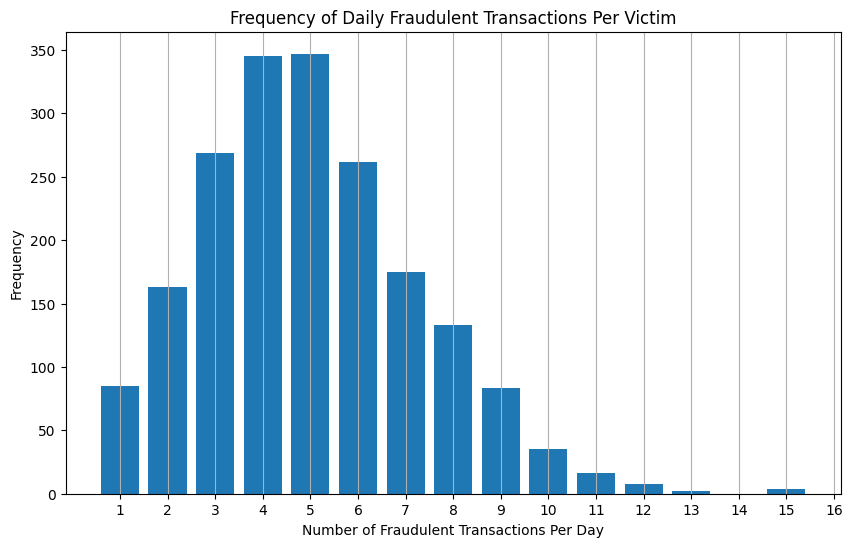

In [74]:
# Plotting a histogram of the counts
plt.figure(figsize=(10, 6))
fraud_per_day_per_victim.hist(bins=range(1, fraud_per_day_per_victim.max() + 1), align='left', rwidth=0.8)
plt.title('Frequency of Daily Fraudulent Transactions Per Victim')
plt.xlabel('Number of Fraudulent Transactions Per Day')
plt.ylabel('Frequency')
plt.xticks(range(1, fraud_per_day_per_victim.max() + 1))  # Ensure there's a tick for each count
plt.grid(axis='y')

plt.show()


The histogram above shows the distribution of the number of fraudulent transactions with the same victim per day, offering insights into the behavior or temporal pattern of fraudulent activities targeting individual customers. Moderately low transaction counts, specifically between 3 to 6 transactions per day, emerge as the most prevalent, with a notable peak observed at 4 to 5 transactions per day, each nearing 350 occurrences. In contrast, higher transaction counts, particularly 10 transactions and above, are significantly less common, with their frequency quickly tapering off to below 20 occurrences. 

# Q4: For each purchase "category," plot the mean and standard "amt" between fraudulent transactions and non-fraudulent transactions

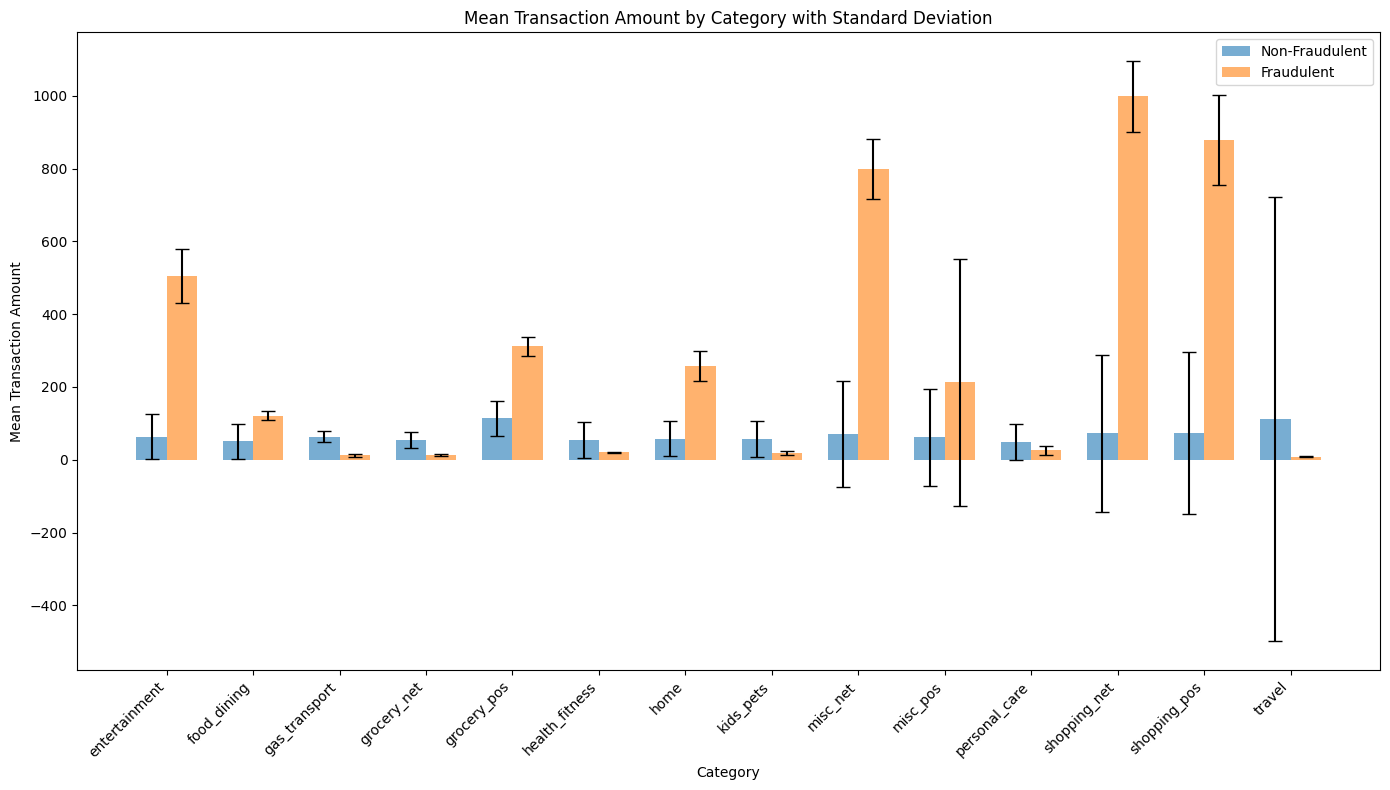

In [79]:
# Group data by category and is_fraud, then calculate mean and std
category_stats = data.groupby(['category', 'is_fraud'])['amt'].agg(['mean', 'std']).reset_index()

# Separating the data into fraudulent and non-fraudulent for plotting
fraudulent = category_stats[category_stats['is_fraud'] == 1]
non_fraudulent = category_stats[category_stats['is_fraud'] == 0]

# Setting up x-coordinates for the bars
x_coords = np.arange(len(category_stats['category'].unique()))

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35  # Width of the bars

# Plotting both fraudulent and non-fraudulent bars
ax.bar(x_coords - bar_width/2, non_fraudulent['mean'], yerr=non_fraudulent['std'], width=bar_width, label='Non-Fraudulent', align='center', alpha=0.6, capsize=5)
ax.bar(x_coords + bar_width/2, fraudulent['mean'], yerr=fraudulent['std'], width=bar_width, label='Fraudulent', align='center', alpha=0.6, capsize=5)

# Adding some final touches to the plot
ax.set_xlabel('Category')
ax.set_ylabel('Mean Transaction Amount')
ax.set_title('Mean Transaction Amount by Category with Standard Deviation')
ax.set_xticks(x_coords)
ax.set_xticklabels(category_stats['category'].unique(), rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


# Q7. Are certain states, cities, and zip codes more susceptible to fraudulent transactions?

In [85]:
# Calculate the count of fraudulent transactions by state
fraud_counts_by_state = data[data['is_fraud'] == 1].groupby('state').size()

# Calculate the total transactions and fraud rate by state
total_transactions_by_state = data.groupby('state').size()
fraud_rates_by_state = (fraud_counts_by_state / total_transactions_by_state) * 100

fraud_counts_by_zip = data[data['is_fraud'] == 1].groupby('zip').size()
total_transactions_by_zip = data.groupby('zip').size()
fraud_rates_by_zip = (fraud_counts_by_zip / total_transactions_by_zip) * 100


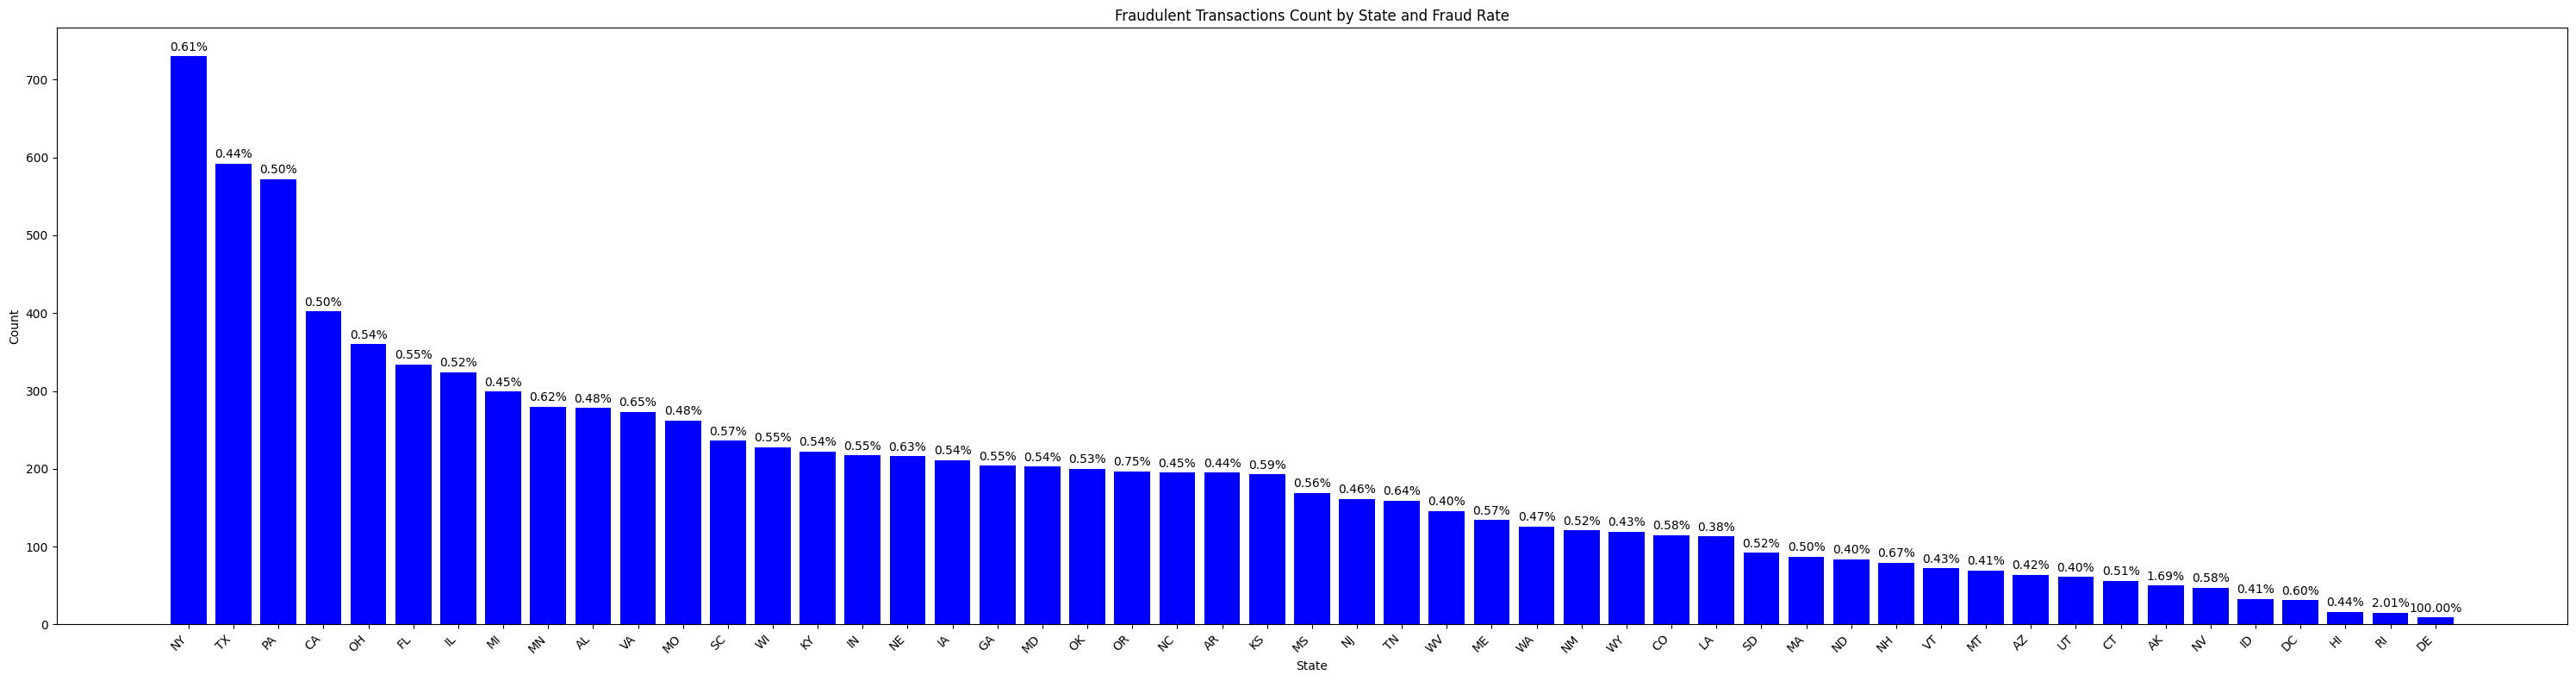

In [326]:
fraud_counts_by_state.sort_values(ascending=False, inplace=True)

# Plot the top 10 states by fraud count
top_states = fraud_counts_by_state

# Calculate total transactions by state
total_transactions_by_state = data.groupby('state').size()

# Calculate fraud rate by state
fraud_rate_by_state = (fraud_counts_by_state / total_transactions_by_state) * 100

# Plotting
plt.figure(figsize=(30, 8))

# Create an array for x-axis positions
x = np.arange(len(top_states))

# Plotting stacked bars for total transactions and fraudulent transactions
plt.bar(x, fraud_counts_by_state[top_states.index], color='blue')


# Adding labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Fraudulent Transactions Count by State and Fraud Rate')
plt.xticks(x, top_states.index, rotation=45, ha='right')  # Set x-axis labels


# Adding percentage text on top of each bar
for i, state in enumerate(top_states.index):
    plt.text(i,  fraud_counts_by_state[state] + 0.01 *  fraud_counts_by_state.max(), f'{fraud_rate_by_state[state]:.2f}%', ha='center')

plt.tight_layout()
plt.show()



In [227]:
fraud_counts_by_state


state
NY    730
TX    592
PA    572
CA    402
OH    360
FL    334
IL    324
MI    299
MN    280
AL    278
VA    273
MO    262
SC    236
WI    228
KY    222
IN    217
NE    216
IA    211
GA    204
MD    203
OK    200
OR    197
NC    195
AR    195
KS    193
MS    169
NJ    161
TN    159
WV    146
ME    134
WA    126
NM    121
WY    119
CO    115
LA    113
SD     92
MA     87
ND     84
NH     79
VT     72
MT     69
AZ     64
UT     61
CT     56
AK     50
NV     47
ID     33
DC     31
HI     16
RI     15
DE      9
dtype: int64

Based on the fraud counts and fraud rates by state, New York (NY) stands out at the top, with 730 reported cases of fraud, followed closely by Texas (TX) and Pennsylvania (PA), showcasing a notable concentration of fraudulent activity in populous states. Conversely, the fraud rate, especially in states with fewer transactions, reveals the proportionate impact of fraud, offering insights into how fraud prevalence relative to transaction volume varies across states. Delaware (DE) experienced 9 fraud transactions with no recorded non-fraudulent transactions, highlighting an anomaly within the dataset.

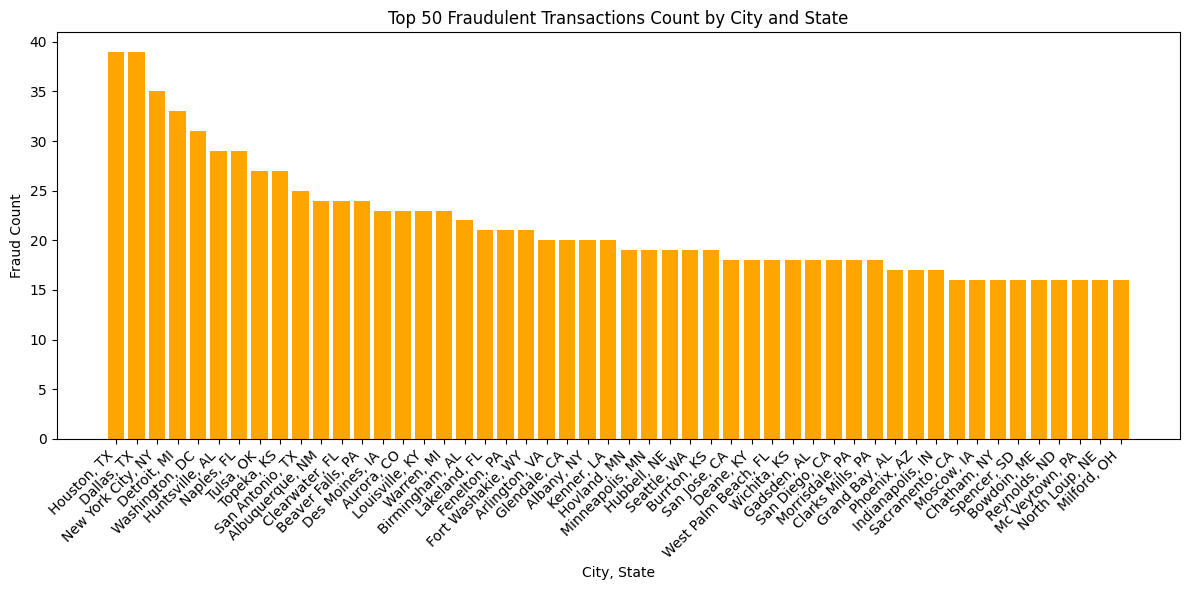

In [366]:

# Step 1: Group by both city and state for fraud counts and total transactions
fraud_counts_by_city_state = data[data['is_fraud'] == 1].groupby(['city', 'state']).size()
total_transactions_by_city_state = data.groupby(['city', 'state']).size()

# Step 2: Calculate fraud rates by city-state
fraud_rates_by_city_state = (fraud_counts_by_city_state / total_transactions_by_city_state) * 100

# Step 3: Sort cities by fraud count, descending
top_cities_by_fraud = fraud_counts_by_city_state.sort_values(ascending=False).head(50)

# Plotting
plt.figure(figsize=(12, 6))  # Set the figure size

# Create an array for x-axis positions
x = np.arange(len(top_cities_by_fraud))

# Concatenate city and state for labeling
city_state_labels = top_cities_by_fraud.index.map(lambda x: f"{x[0]}, {x[1]}")

# Plotting bars for fraudulent transactions in the top city-state pairs
plt.bar(x, top_cities_by_fraud.values, color='orange')

# Adding labels and title
plt.xlabel('City, State')
plt.ylabel('Fraud Count')
plt.title('Top 50 Fraudulent Transactions Count by City and State')

# Set x-axis labels to top cities' names with rotation for better readability
plt.xticks(x, city_state_labels, rotation=45, ha='right')

# Adding fraud rate percentage text on top of each bar
for i, (city, state) in enumerate(top_cities_by_fraud.index):
    rate = fraud_rates_by_city_state.loc[(city, state)]

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [318]:
# Step 1: Aggregate fraud counts by city and state
fraud_counts_by_city_state = data[data['is_fraud'] == 1].groupby(['city', 'state']).size()

# Calculate total transactions by city and state
total_transactions_by_city_state = data.groupby(['city', 'state']).size()
fraud_cases_by_pop = fraud_transactions.groupby(['city', 'state', 'city_pop']).size()

# Step 2: Calculate fraud rates by city-state
fraud_rates_by_city_state = (fraud_counts_by_city_state / total_transactions_by_city_state) * 100

# Creating a DataFrame from the series
fraud_summary = pd.DataFrame({
    'fraud_counts': fraud_counts_by_city_state,
    'fraud_rate': fraud_rates_by_city_state,
}).reset_index()

# Step 3: Sort by fraud counts and select the top 20
top_fraud_cities = fraud_summary.sort_values(by='fraud_counts', ascending=False).head(20)

# Display the DataFrame
top_fraud_cities


,city,state,fraud_counts,fraud_rate
381,Houston,TX,39.0,0.66
210,Dallas,TX,39.0,0.76
595,New York City,NY,35.0,0.95
229,Detroit,MI,33.0,0.64
884,Washington,DC,31.0,0.60
391,Huntsville,AL,29.0,0.57
585,Naples,FL,29.0,0.50
852,Tulsa,OK,27.0,0.61
848,Topeka,KS,27.0,0.61
761,San Antonio,TX,25.0,0.34


The figure above indicates that certain cities are indeed more susceptible to fraudulent activities. With Houston, TX, and Dallas, TX, leading the list with 39 fraud cases each, followed by significant numbers in New York City, NY, and Detroit, MI. 

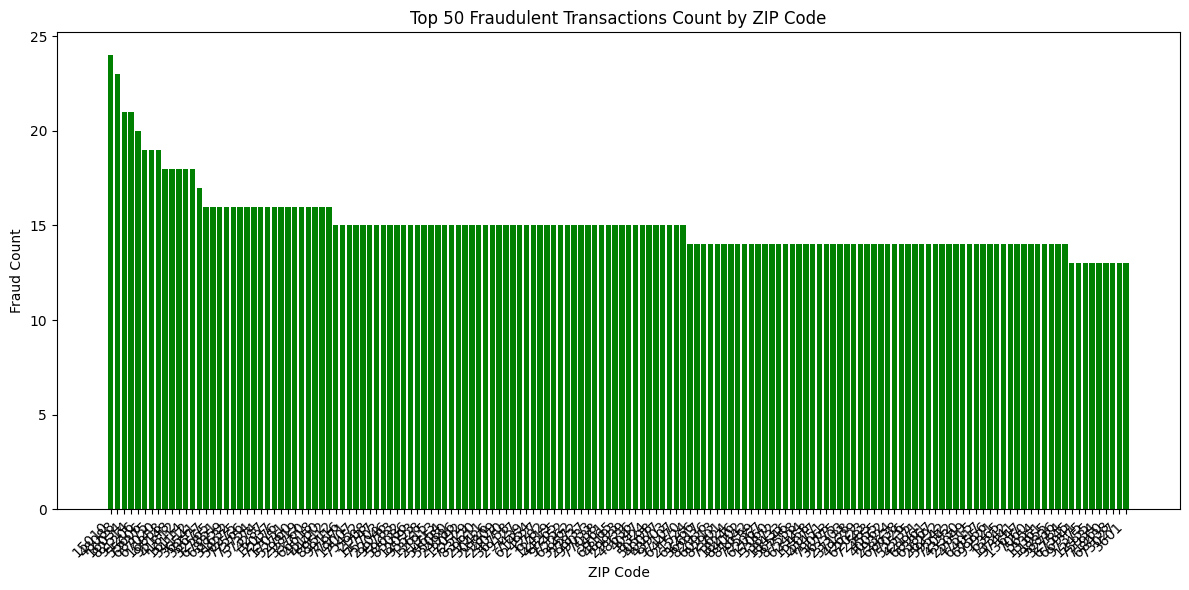

In [434]:
fraud_counts_by_zip.sort_values(ascending=False, inplace=True)

# Select the top 10 ZIP codes by fraud count
top_zips = fraud_counts_by_zip.head(150)

# Plotting
plt.figure(figsize=(12, 6))  # Set the figure size

# Create an array for x-axis positions
x = np.arange(len(top_zips))

# Plotting bars for fraudulent transactions in the top ZIP codes
plt.bar(x, fraud_counts_by_zip[top_zips.index], color='green')

# Adding labels and title
plt.xlabel('ZIP Code')
plt.ylabel('Fraud Count')
plt.title('Top 50 Fraudulent Transactions Count by ZIP Code')

# Set x-axis labels to top ZIP codes' names with rotation for better readability
plt.xticks(x, top_zips.index, rotation=45, ha='right')


plt.tight_layout()  # Adjust layout to make room for all elements
plt.show()

In [233]:
top_zips

zip
15010    24
48088    23
16034    21
82514    21
91206    20
55606    19
68375    19
67020    19
16858    18
95148    18
41812    18
16114    18
34112    18
36541    17
38677    16
52760    16
67851    16
17051    16
72476    16
44412    16
dtype: int64

# Q10. Is there a relationship between between "city_pop" and incidence of fraud?

In [416]:
fraud_cases_by_pop = data.groupby('city_pop')['is_fraud'].sum().reset_index()
fraud_cases_by_pop 

,city_pop,is_fraud
0,23,8
1,37,9
2,43,0
3,46,12
4,47,6
...,...,...
886,1577385,35
887,1595797,25
888,2383912,9
889,2504700,10


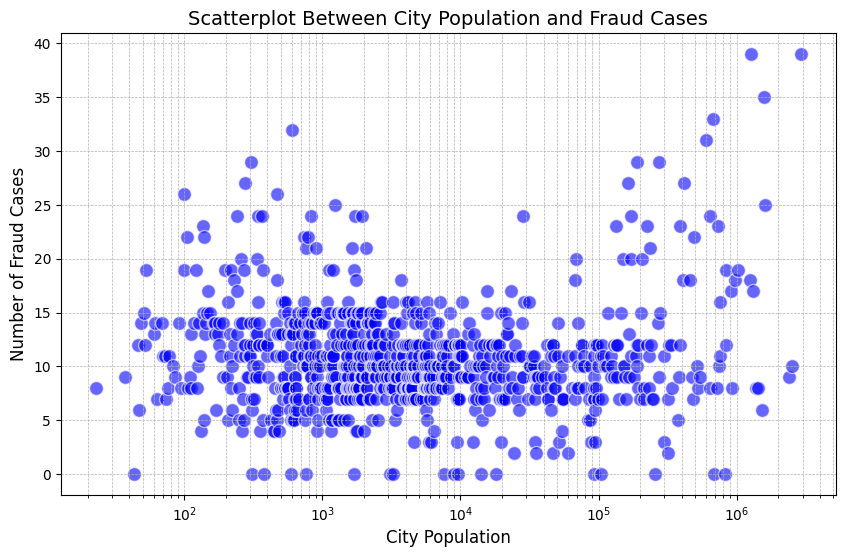

In [427]:
# Group by 'city_pop' and calculate the total number of fraud cases for each population size
fraud_cases_by_pop = data.groupby('city_pop')['is_fraud'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(fraud_cases_by_pop['city_pop'], fraud_cases_by_pop['is_fraud'], color='blue', alpha=0.6, edgecolors='w', s=100)

# Adding plot labels and title
plt.title('Scatterplot Between City Population and Fraud Cases', fontsize=14)
plt.xlabel('City Population', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.xscale('log')  # Using a logarithmic scale for better visualization
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

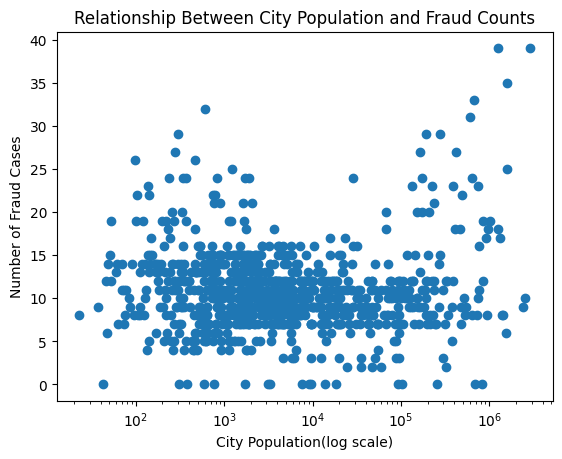

,city_pop,is_fraud
city_pop,1.00,0.24
is_fraud,0.24,1.00


In [429]:
# Step 3: Statistical analysis (Example: Correlation)
correlation = fraud_cases_by_pop.corr(method='pearson')

# Step 4: Visualization
plt.scatter(fraud_cases_by_pop['city_pop'], fraud_cases_by_pop['is_fraud'])
plt.xscale('log')
plt.xlabel('City Population(log scale)')
plt.ylabel('Number of Fraud Cases')
plt.title('Relationship Between City Population and Fraud Counts')
plt.show()

correlation

Kruskal-Wallis Test Statistic: 890.0000000000001
P-value: 0.4936960290919865


In [403]:
fraud_cases_by_pop = fraud_transactions.groupby(['city', 'state', 'city_pop']).size().reset_index(name='fraud_counts')

# Step 2: Sort by fraud counts and select the top 20
top_fraud_cities = fraud_cases_by_pop.sort_values(by='fraud_counts', ascending=False).head(50)



In [424]:
fraud_cases_by_pop = fraud_transactions.groupby(['city', 'state', 'city_pop']).size().reset_index(name='fraud_counts')


# Step 3: Statistical analysis (Example: Correlation)
correlation = fraud_cases_by_pop.corr(method='pearson')

# Step 4: Visualization
plt.scatter(fraud_cases_by_pop_df['city_pop'], fraud_cases_by_pop_df['fraud_count'])
plt.xscale('log')
plt.xlabel('City Population(log scale)')
plt.ylabel('Number of Fraud Cases')
plt.title('Relationship Between City Population and Fraud Cases')
plt.show()

correlation

TypeError: Series.corr() missing 1 required positional argument: 'other'

In [425]:
fraud_cases_by_pop 

city_pop
23          8
37          9
46         12
47          6
49         14
           ..
1577385    35
1595797    25
2383912     9
2504700    10
2906700    39
Length: 873, dtype: int64

In [417]:
x = data.groupby('city_pop')['is_fraud'].sum().reset_index()
x

,city_pop,is_fraud
0,23,8
1,37,9
2,43,0
3,46,12
4,47,6
...,...,...
886,1577385,35
887,1595797,25
888,2383912,9
889,2504700,10


The bubble chart reveals a fascinating trend regarding the susceptibility of cities to fraudulent transactions, illustarting that city population size does not directly dictate the prevalence of fraud. Among the top 50 cities for fraud cases, there's a wide range of city populations, from metropolitan giants like Houston, TX, with a population of 2,906,700, and Dallas, TX, with 1,263,321, each reporting 39 fraud cases, to significantly smaller locales such as Fenelton, PA, and Fort Washakie, WY, with populations of just 2,054 and 1,645 respectively, yet still making the list with 21 fraud cases each.  Additionally, the correlation between city population and the number of fraud cases is a negligible 0.2, indicating that the relationship between a city's population size and its vulnerability to fraud is minimal.

In [421]:
# Min-Max Normalization function
from scipy.stats import pearsonr
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize city_pop and fraud_counts
fraud_cases_by_pop['normalized_city_pop'] = min_max_normalize(fraud_cases_by_pop['city_pop'])
fraud_cases_by_pop['normalized_fraud_counts'] = min_max_normalize(fraud_cases_by_pop['is_fraud'])

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(fraud_cases_by_pop['normalized_city_pop'], fraud_cases_by_pop['normalized_fraud_counts'])

print("Pearson Correlation Coefficient between normalized_city_pop and normalized_fraud_counts:", pearson_corr)

Pearson Correlation Coefficient between normalized_city_pop and normalized_fraud_counts: 0.23516731458649998


In [394]:
import plotly.io as pio
pio.renderers.default = 'notebook'
# Creating the bubble chart
top_fraud_cities['city_state'] = top_fraud_cities['city'] + ', ' + top_fraud_cities['state']

fig = px.scatter(top_fraud_cities, x="city_state", y="fraud_counts",
                 size="city_pop", color = 'state',
                 size_max=60, title="Top 50 Fraud Cities by City Population and Fraud Counts(Bubble Size Represents City Population)")

# Remove the x-axis label
fig.update_layout(xaxis_title="")
fig.write_html('first_figure.html', auto_open=True)

In [395]:
import pandas as pd
import plotly.express as px

# Assuming 'top_fraud_cities' is your DataFrame and you've created the 'city_state' column
# Create the bubble chart
fig = px.scatter(top_fraud_cities, x="city_state", y="fraud_counts",
                 size="city_pop", size_max=60, 
                 title="Top Fraud Cities by City Population and Fraud Counts (Bubble Size Represents City Population)")

# Remove the x-axis label
fig.update_layout(xaxis_title="")

# Add annotations for specific cities
# Note: You need to replace 'some_index' with the actual index or condition that identifies Fenelton, PA, and Fort Washakie, WY
annotations = [
    dict(x=top_fraud_cities[top_fraud_cities['city_state'] == 'Fenelton, PA']['city_state'].iloc[0], 
         y=top_fraud_cities[top_fraud_cities['city_state'] == 'Fenelton, PA']['fraud_counts'].iloc[0],
         xref="x", yref="y",
         text="Fenelton, PA", showarrow=True, arrowhead=1, ax=0, ay=-40),
    dict(x=top_fraud_cities[top_fraud_cities['city_state'] == 'Fort Washakie, WY']['city_state'].iloc[0], 
         y=top_fraud_cities[top_fraud_cities['city_state'] == 'Fort Washakie, WY']['fraud_counts'].iloc[0],
         xref="x", yref="y",
         text="Fort Washakie, WY", showarrow=True, arrowhead=1, ax=0, ay=-40)
]

fig.update_layout(annotations=annotations)

# Save the figure as an HTML file and automatically open it
fig.write_html('figure.html', auto_open=True)


In [397]:
# Group by city name and collect unique states for each city
cities_states = data.groupby('city')['state'].nunique()

# Filter cities that appear in more than one state
duplicate_cities = cities_states[cities_states > 1]
duplicate_cities

city
Afton          2
Allentown      3
Andrews        2
Arcadia        3
Bay City       2
Benton         2
Birmingham     2
Brandon        2
Burbank        2
Camden         3
Clarksville    2
Cleveland      2
Conway         2
Fulton         2
Georgetown     2
Hampton        2
Hudson         2
Irvine         2
Meadville      2
Meridian       2
Mesa           2
Norwalk        2
Oakland        2
Orient         2
Randolph       2
Springfield    2
Summerfield    2
Thomas         2
Utica          3
Warren         2
Name: state, dtype: int64

In [398]:
# Group by city and aggregate unique states
cities_states = data.groupby('city').agg({'state': pd.Series.nunique})

# Filter cities with more than one state
cities_with_multiple_states = cities_states[cities_states['state'] > 1]

# Show cities that appear in more than one state
print(cities_with_multiple_states)

             state
city              
Afton            2
Allentown        3
Andrews          2
Arcadia          3
Bay City         2
Benton           2
Birmingham       2
Brandon          2
Burbank          2
Camden           3
Clarksville      2
Cleveland        2
Conway           2
Fulton           2
Georgetown       2
Hampton          2
Hudson           2
Irvine           2
Meadville        2
Meridian         2
Mesa             2
Norwalk          2
Oakland          2
Orient           2
Randolph         2
Springfield      2
Summerfield      2
Thomas           2
Utica            3
Warren           2


In [402]:
# Group by city and list unique states
cities_states = data.groupby('city').agg({'state': lambda x: set(x)})

# Filter cities present in more than one state by checking the length of the state set
cities_with_multiple_states = cities_states[cities_states['state'].apply(len) > 1]

cities_with_multiple_states

,state
city,
Afton,"{MN, MI}"
Allentown,"{PA, NY, GA}"
Andrews,"{NC, IN}"
Arcadia,"{OH, SC, MI}"
Bay City,"{OR, MI}"
Benton,"{TN, WI}"
Birmingham,"{IA, AL}"
Brandon,"{FL, VT}"
Burbank,"{OK, WA}"


In [436]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Assuming 'X' contains your feature matrix and 'y' contains your target variable
X = data.drop(columns=['is_fraud', 'cc_num','trans_date_trans_time','trans_date', 'dob', 'age_group', 'first', 'last', 'street', 'city', 'trans_num'])
y = data['is_fraud']
# Scale the 'city_pop' and 'unix_time' features
X[['city_pop', 'unix_time']] = scaler.fit_transform(X[['city_pop', 'unix_time']])

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the 'city_pop' and 'unix_time' features
X[['city_pop', 'unix_time']] = scaler.fit_transform(X[['city_pop', 'unix_time']])
# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


In [477]:
importance_df

,Feature,Importance
4,amt,0.38
3,category,0.18
12,unix_time,0.05
0,Unnamed: 0,0.05
15,age_at_transaction,0.04
14,merch_long,0.04
13,merch_lat,0.04
16,distance,0.03
10,city_pop,0.03
2,merchant,0.03


In [451]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   cc_num              int64  
 2   merchant            object 
 3   category            object 
 4   amt                 float64
 5   first               object 
 6   last                object 
 7   sex                 object 
 8   street              object 
 9   city                object 
 10  state               object 
 11  zip                 int64  
 12  lat                 float64
 13  long                float64
 14  city_pop            int64  
 15  job                 object 
 16  trans_num           object 
 17  unix_time           int64  
 18  merch_lat           float64
 19  merch_long          float64
 20  age_at_transaction  int64  
 21  distance            float64
 22  merchant_encoded    int64  
dtypes: float64(6), int64(7), object(10)
memory usage: 325.1+ 

In [449]:
from sklearn.preprocessing import LabelEncoder

In [476]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object

label_encoder = LabelEncoder()
#data['city_state'] = data['city'] + ', ' + data['state']

data['city_state'] = label_encoder.fit_transform(data['city_state'])
# Apply label encoding to the 'merchant' column and replace it with the encoded values
data['merchant'] = label_encoder.fit_transform(data['merchant'])
data['category'] = label_encoder.fit_transform(data['category'])
data['sex'] = label_encoder.fit_transform(data['sex'])
data['state'] = label_encoder.fit_transform(data['state'])
data['job'] = label_encoder.fit_transform(data['job'])


In [499]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
X = data.drop(columns=['is_fraud', 'cc_num','trans_date_trans_time','trans_date', 'dob', 'age_group', 'first', 'last', 'street', 'city', 'trans_num'])
y = data['is_fraud']



# Scale the 'city_pop' and 'unix_time' features
X[['city_pop', 'unix_time']] = scaler.fit_transform(X[['city_pop', 'unix_time']])

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the 'city_pop' and 'unix_time' features
X[['city_pop', 'unix_time']] = scaler.fit_transform(X[['city_pop', 'unix_time']])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Lasso regression model
lasso = Lasso(alpha=1)  # Adjust alpha as needed for regularization strength
lasso.fit(X_train, y_train)

# Evaluate the model
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Extract feature importances (coefficients)
feature_importances = np.abs(lasso.coef_)

Mean Squared Error: 0.005047355495371306


In [500]:
# Extract feature importances (coefficients)
feature_importances = np.abs(lasso.coef_)

feature_importances

array([1.73166569e-09, 0.00000000e+00, 0.00000000e+00, 5.37640282e-05,
       0.00000000e+00, 0.00000000e+00, 4.69479009e-09, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [490]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the 'city_pop' and 'unix_time' features
X[['city_pop', 'unix_time']] = scaler.fit_transform(X[['city_pop', 'unix_time']])

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the 'city_pop' and 'unix_time' features
X[['city_pop', 'unix_time']] = scaler.fit_transform(X[['city_pop', 'unix_time']])

In [501]:
X

,Unnamed: 0,merchant,category,amt,sex,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,age_at_transaction,distance,city_state
0,0,514,8,4.97,0,27,28654,36.08,-81.18,-0.28,372,-1.83,36.01,-82.05,31,78.60,556
1,1,241,4,107.23,0,47,99160,48.89,-118.21,-0.29,431,-1.83,49.16,-118.19,41,30.21,646
2,2,390,0,220.11,1,13,83252,42.18,-112.26,-0.28,308,-1.83,43.15,-112.15,57,108.21,495
3,3,360,2,45.00,1,26,59632,46.23,-112.11,-0.29,330,-1.83,47.03,-112.56,52,95.67,93
4,4,297,9,41.96,1,45,24433,38.42,-79.46,-0.29,116,-1.83,38.67,-78.63,33,77.56,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,1852389,507,5,43.77,1,24,63453,40.49,-91.89,-0.29,477,1.64,39.95,-91.33,54,77.03,492
1852390,1852390,264,7,111.84,1,43,77566,29.04,-95.44,-0.20,207,1.64,29.66,-96.19,21,100.07,448
1852391,1852391,496,7,86.88,0,47,99323,46.20,-118.90,-0.28,307,1.64,46.66,-119.72,39,80.76,121
1852392,1852392,75,13,7.99,1,13,83643,44.63,-116.45,-0.29,63,1.64,44.47,-117.08,55,52.93,532
